In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import random
import tensorflow.keras as K
from tensorflow.keras.callbacks import EarlyStopping
import os

prod = pd.read_csv('data/well production.csv')

In [271]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,180.0,211.0,277.0,338.0,397.0,445.0,547.0,562.0,639.0,668.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,22.0,27.0,75.0,74.0,59.0,90.0,124.0,119.0,126.0,157.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,15.0,15.0,31.0,30.0,33.0,31.0,20.0,49.0,30.0,41.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,9.0,13.0,78.0,86.0,119.0,134.0,139.0,162.0,136.0,183.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,350.0,403.0,487.0,551.0,618.0,694.0,761.0,811.0,906.0,955.0
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,360.0,439.0,520.0,577.0,650.0,724.0,792.0,897.0,934.0,1017.0
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,54.0,86.0,93.0,84.0,135.0,169.0,162.0,211.0,216.0,275.0


In [272]:
oil = prod.filter(regex="oil.*")

In [273]:
oil

,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,oil 7,oil 8,oil 9,oil 10,oil 11,oil 12
0,862.0,824.0,759.0,728.0,661.0,601.0,542.0,493.0,392.0,376.0,299.0,271.0
1,228.0,249.0,214.0,210.0,161.0,163.0,178.0,147.0,112.0,117.0,110.0,79.0
2,67.0,85.0,73.0,73.0,57.0,58.0,55.0,57.0,68.0,38.0,58.0,47.0
3,256.0,242.0,267.0,263.0,199.0,191.0,158.0,142.0,137.0,115.0,141.0,93.0
4,23.0,29.0,31.0,50.0,72.0,52.0,61.0,45.0,27.0,36.0,18.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,981.0,921.0,873.0,821.0,737.0,673.0,606.0,530.0,463.0,413.0,318.0,269.0
96,5.0,47.0,12.0,6.0,54.0,1.0,1.0,28.0,35.0,46.0,43.0,37.0
97,1053.0,997.0,954.0,875.0,794.0,737.0,664.0,590.0,522.0,417.0,380.0,296.0
98,332.0,343.0,305.0,273.0,266.0,275.0,224.0,190.0,197.0,148.0,143.0,84.0


In [274]:
total_oil = oil.sum(axis=1)

In [275]:
total_oil

0     6808.0
1     1968.0
2      736.0
3     2204.0
4      490.0
       ...  
95    7605.0
96     315.0
97    8279.0
98    2780.0
99    4355.0
Length: 100, dtype: float64

In [276]:
prod['total oil'] = total_oil

In [277]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,total oil
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,211.0,277.0,338.0,397.0,445.0,547.0,562.0,639.0,668.0,6808.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,27.0,75.0,74.0,59.0,90.0,124.0,119.0,126.0,157.0,1968.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,15.0,31.0,30.0,33.0,31.0,20.0,49.0,30.0,41.0,736.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,13.0,78.0,86.0,119.0,134.0,139.0,162.0,136.0,183.0,2204.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,403.0,487.0,551.0,618.0,694.0,761.0,811.0,906.0,955.0,7605.0
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,315.0
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,439.0,520.0,577.0,650.0,724.0,792.0,897.0,934.0,1017.0,8279.0
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,86.0,93.0,84.0,135.0,169.0,162.0,211.0,216.0,275.0,2780.0


In [278]:
min_eastings = np.zeros(oil.shape[0])
max_eastings = np.zeros(oil.shape[0])
northings = np.zeros(oil.shape[0])

well_names = list(prod['well name'])
for _, row in prod.iterrows():
    idx = well_names.index(row['well name'])
    temp = pd.read_csv('data/' + row['well name'] + '.csv')
    loc = {'name' : file[:-4], 'min_easting' : temp['easting'].min(), 'max_easting' : temp['easting'].max(), 'northing' : temp['northing'][0]}

    min_eastings[idx] = temp['easting'].min()
    max_eastings[idx] = temp['easting'].max()
    northings[idx] = temp['northing'][0]

prod['min eastings'] = pd.Series(min_eastings)
prod['max eastings'] = pd.Series(max_eastings)
prod['northings'] = pd.Series(northings)


In [279]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 7,water 8,water 9,water 10,water 11,water 12,total oil,min eastings,max eastings,northings
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,397.0,445.0,547.0,562.0,639.0,668.0,6808.0,78000.0,85565.0,1600.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,59.0,90.0,124.0,119.0,126.0,157.0,1968.0,88400.0,98043.0,32200.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,33.0,31.0,20.0,49.0,30.0,41.0,736.0,8200.0,19163.0,200.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,119.0,134.0,139.0,162.0,136.0,183.0,2204.0,79500.0,90164.0,31000.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,7.0,0.0,490.0,5400.0,12676.0,79200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,618.0,694.0,761.0,811.0,906.0,955.0,7605.0,59100.0,66041.0,25400.0
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,315.0,15400.0,22655.0,73900.0
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,650.0,724.0,792.0,897.0,934.0,1017.0,8279.0,60700.0,65018.0,25600.0
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,135.0,169.0,162.0,211.0,216.0,275.0,2780.0,75100.0,83679.0,12900.0


In [280]:
def plot_range(x_min, x_max, y_min, y_max, res):
    slope = (y_max - y_min)/(x_max - x_min)
    interval = (x_max - x_min)/res
    x = [x_min + interval*i for i in range(res)]
    y = [y_min + slope*(x_min + interval*i) for i in range(res)]
    
    return np.array(x).flatten('F'), np.array(y).flatten('F')

[78000.   78378.25 78756.5  ... 67800.75 68065.5  68330.25]


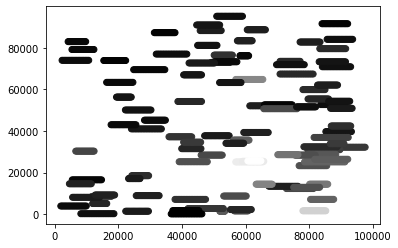

In [281]:
x, y = plot_range(prod['min eastings'], prod['max eastings'], prod['northings'], prod['northings'], 20)
print(x)
color = []
for i in prod['total oil']:
    color.append(20*[i])
plt.scatter(x, y, c=np.repeat(prod['total oil'], 20))
#plt.scatter(x, y)

Train on 4300 samples, validate on 5700 samples
Epoch 1/100
4300/4300 [==============================] - 0s 85us/sample - loss: 0.0221 - val_loss: 0.0398
Epoch 2/100
4300/4300 [==============================] - 0s 68us/sample - loss: 0.0109 - val_loss: 0.0453
Epoch 3/100
4300/4300 [==============================] - 0s 83us/sample - loss: 0.0111 - val_loss: 0.0377
Epoch 4/100
4300/4300 [==============================] - 0s 66us/sample - loss: 0.0108 - val_loss: 0.0442
Epoch 5/100
4300/4300 [==============================] - 0s 69us/sample - loss: 0.0111 - val_loss: 0.0403
Epoch 6/100
4300/4300 [==============================] - 0s 65us/sample - loss: 0.0108 - val_loss: 0.0411
Epoch 7/100
4300/4300 [==============================] - 0s 83us/sample - loss: 0.0107 - val_loss: 0.0395
Epoch 8/100
4300/4300 [==============================] - 0s 67us/sample - loss: 0.0105 - val_loss: 0.0374
Epoch 9/100
4300/4300 [==============================] - 0s 65us/sample - loss: 0.0107 - val_loss: 0.037

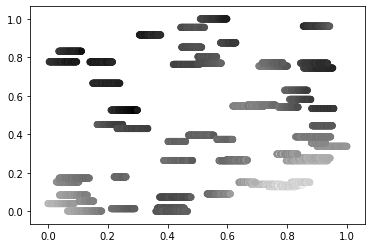

In [308]:
def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(prod.loc[prod['well name'] == i[:-4]]['total oil'])
                t_oil = np.repeat(value, len(df.index))
                df['total oil'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(prod.loc[prod['well name'] == i[:-4]]['total oil'])
                t_oil = np.repeat(value, len(df.index))
                df['total oil'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
# separates our dependent variable out
    y_train = X_train.pop('total oil')
    y_test = X_test.pop('total oil')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[9,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)
